In [3]:
!pip install glob2
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install ast 



     |████████████████████████████████| 14.9 MB 2.7 MB/s eta 0:00:01    |███▌                            | 1.6 MB 3.3 MB/s eta 0:00:04     |████                            | 1.9 MB 3.3 MB/s eta 0:00:04     |████▉                           | 2.2 MB 3.3 MB/s eta 0:00:04
     |████████████████████████████████| 9.7 MB 12.9 MB/s eta 0:00:0145 kB 4.0 MB/s eta 0:00:03     |███████████▍                    | 3.5 MB 4.0 MB/s eta 0:00:02    | 6.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 7.2 MB/s eta 0:00:01     |███████████████████████████     | 430 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 3.9 MB/s eta 0:00:01     |████████████████████████████    | 10.1 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 15.7 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /home/meteor21/.conda/envs/conda_env/bin/python -c 'import sys

In [5]:
!pip install Image

     |████████████████████████████████| 7.8 MB 24 kB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 179 kB/s eta 0:00:01
  Created wheel for Image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=3227bc2e197c669c6354eff862138373a69efd1a0553d062a6afcdbb862cc327
  Stored in directory: /home/meteor21/.cache/pip/wheels/14/4c/7c/d9b5c35a149d3bc8c72c7e92372913ff7dac9c6bd94bd1b8c9
Successfully built Image


In [7]:
!pip install tqdm 

     |████████████████████████████████| 72 kB 192 kB/s eta 0:00:01


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import glob2
import PIL
from tqdm import tqdm

import numpy as np
import shutil

In [10]:
try:
    import Image
except ImportError:
    from PIL import Image

In [48]:
txtfiles = glob2.glob('./annotations/*.txt')
txtfiles[:2]

['./annotations/gt_img_1.txt', './annotations/gt_img_2.txt']

In [99]:
txtfiles = glob2.glob('./annotations/*.txt')  #create a list of all txt files

x1 = []  #create an empty list
y1 = []  #create an empty list
x2 = []  #create an empty list
y2 = []  #create an empty list
x3 = []  #create an empty list
y3 = []  #create an empty list
x4 = []  #create an empty list
y4 = []  #create an empty list
labels = []  #create an empty list
names = []  #create an empty list
X1 = []  #create an empty list
Y1 = []  #create an empty list
X2 = []  #create an empty list
Y2 = []  #create an empty list
image_width = []  #create an empty list
image_height = []  #create an empty list


for txt in tqdm(txtfiles):  #iterate over each txt file
    
    with open(txt, 'r', encoding='utf-8-sig') as f:  #read through a txt file
        lines = f.readlines()  #store the read lines into a list
        
        gt_name = txt.split('/')[2].split('.')[0]  #get this part 'gt_img_1'
        name = gt_name.removeprefix('gt_')  #get this part 'img_1'

        #print(len(lines))


        for thing in lines:    #iterate over each line
            
            x_up_left = int(thing.split(',')[0])  #store the corresponding coordinate
            y_up_left = int(thing.split(',')[1])  #store the corresponding coordinate
            x_up_right = int(thing.split(',')[2]) #store the corresponding coordinate
            y_up_right = int(thing.split(',')[3])  #store the corresponding coordinate
            x_down_right = int(thing.split(',')[4])  #store the corresponding coordinate
            y_down_right = int(thing.split(',')[5])  #store the corresponding coordinate
            x_down_left = int(thing.split(',')[6])  #store the corresponding coordinate
            y_down_left = int(thing.split(',')[7])  #store the corresponding coordinate
            
            X_up_left = min(x_up_left, x_down_left)  #take the min for the rectangle
            Y_up_left = min(y_up_left, y_up_right)  #take the min for the rectangle
            X_down_right = max(x_up_right, x_down_right)  #take the max for the rectangle
            Y_down_right = max(y_down_right, y_down_left)  #take the max for the rectangle
            
            image = PIL.Image.open(f'./images/{name}.jpg')  #read coresponding images
            width, height = image.size  #store the dimensions
            
            image_width.append(image.size[0])  #add the width to the image_width list
            image_height.append(image.size[1])  #add the height to the image_height list
            
            
            x1.append(int(x_up_left))  #add to the x1 list
            y1.append(int(y_up_left))  #add to the y1 list
            x2.append(int(x_up_right))  #add to the x2 list
            y2.append(int(y_up_right))  #add to the y2 list
            x3.append(int(x_down_right))  #add to the x3 list
            y3.append(int(y_down_right))  #add to the y3 list
            x4.append(int(x_down_left))  #add to the x4 list
            y4.append(int(y_down_left))  #add to the y4 list
            
            X1.append(int(X_up_left))  #add to the X1 list
            Y1.append(int(Y_up_left))  #add to the Y1 list
            X2.append(int(X_down_right))  #add to the X2 list
            Y2.append(int(Y_down_right))  #add to the Y2 list
            
            labels.append(thing.split(',')[8].replace("\n", ""))  #add to the labes list
            names.append(name)

        #x1 = list(map(int, x1))  #transform to a list of int
        #y1 = list(map(int, y1))  #transform to a list of int
        #x2 = list(map(int, x2))  #transform to a list of int
        #y2 = list(map(int, y2))  #transform to a list of int
        #x3 = list(map(int, x3))  #transform to a list of int
        #y3 = list(map(int, y3))  #transform to a list of int
        #x4 = list(map(int, x4))  #transform to a list of int
        #y4 = list(map(int, y4))  #transform to a list of int
        
        
        
#create a dataframe containig the needed lists
df = pd.DataFrame(list(zip(names, labels, X1, Y1, X2, Y2, image_width, image_height)), 
               columns =['imageName', 'bbox', 'X1', 'Y1', 'X2', 'Y2', 'image_width', 'image_height']) 


100%|██████████| 1000/1000 [00:05<00:00, 181.41it/s]


In [102]:
df  #view dataframe

,imageName,bbox,X1,Y1,X2,Y2,image_width,image_height
0,img_1,Genaxis Theatre,377,117,465,130,1280,720
1,img_1,[06],493,115,519,131,1280,720
2,img_1,###,374,155,409,170,1280,720
3,img_1,62-03,492,151,551,170,1280,720
4,img_1,Carpark,376,198,422,212,1280,720
...,...,...,...,...,...,...,...,...
11881,img_999,###,318,465,387,526,1280,720
11882,img_1000,###,486,211,558,248,1280,720
11883,img_1000,###,0,354,91,401,1280,720
11884,img_1000,###,48,393,64,411,1280,720


In [101]:
df.to_csv(r'clean_from_txt_to_csv.csv', index = False) #save to csv

In [104]:
les_noms = df['imageName'].unique().tolist()

for noms in tqdm(les_noms):
    #firstimage = (dataset['imageName'] == noms)
    groupe_of_first_image = df[df['imageName'] == noms]
    groupe = groupe_of_first_image.reset_index(drop=True)
    
    matrix = (np.zeros(((groupe.iloc[0, 7]), (groupe.iloc[0, 6]))))
    for i in range(len(groupe)):

        #matrix = (np.zeros(((groupe.iloc[i, 9]), (groupe.iloc[i, 8]))))

        block = (np.zeros(((groupe.iloc[i, 7]), (groupe.iloc[i, 6]))))

        #block = (np.ones(((groupe.iloc[i, 6]) - (groupe.iloc[i, 4])), ((groupe.iloc[i, 5]) - (groupe.iloc[i, 3]))))

        block[(groupe.iloc[i, 3]):(groupe.iloc[i, 5]), (groupe.iloc[i, 2]):(groupe.iloc[i, 4])] = 1

        matrix = np.add(matrix, block) #matrix + block

    #plt.imshow(matrix)
    #plt.show()
    img = Image.fromarray(matrix)
    img = img.convert('RGB')
    img.save(f'./thousand_masks/{noms}.jpg')

100%|██████████| 1000/1000 [02:58<00:00,  5.61it/s]


In [116]:
l_arr = np.array([[[0, 0],
    [1, 0],
    [2, 0],
    [3, 0]],

   [[0, 1],
    [1, 1],
    [2, 1],
    [3, 1]],

   [[0, 2],
    [1, 2],
    [2, 2],
    [3, 2]],

   [[0, 3],
    [1, 3],
    [2, 3],
    [3, 3]],

   [[0, 4],
    [1, 4],
    [2, 4],
    [3, 4]]])

In [124]:
a = np.zeros((4, 2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [139]:
a[0:2, 0:2] =0
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [138]:
zee = np.ones((2,2))

In [140]:
a[0:2, 0:2] = zee

In [141]:
a

array([[1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.]])

In [162]:
a[0,1]

1.0

In [163]:
np.linalg.norm(a[0,1] - a[0,0])#, axis=(1))

0.0

In [161]:
np.linalg.norm(a - a[0,0], axis=(0))

array([1.41421356, 1.41421356])

In [168]:
m = np.arange(27).reshape(3,3,3)
m

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [185]:
nnn = np.zeros((5,5))
nnn

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [186]:
nnn[:,0]

array([0., 0., 0., 0., 0.])

In [187]:
nnn[2,:]

array([0., 0., 0., 0., 0.])

In [190]:
ayy = nnn[1:4, 1:4] + 1
ayy

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [191]:
nnn[1:4, 1:4] = ayy
nnn

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

In [201]:
mmm = np.indices((5, 5))[1]
mmm

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [207]:
yyy = np.multiply(nnn,mmm)
yyy

array([[0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 0.],
       [0., 1., 2., 3., 0.],
       [0., 1., 2., 3., 0.],
       [0., 0., 0., 0., 0.]])

In [204]:
lll = np.indices((5, 5))[0]
lll

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [208]:
xxx = np.multiply(nnn,lll)
xxx

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 2., 2., 2., 0.],
       [0., 3., 3., 3., 0.],
       [0., 0., 0., 0., 0.]])

In [210]:
nnn[1,1]

1.0

In [212]:
dist = (xxx - 1)*2 + (yyy - 1)*2
dist

array([[-4., -4., -4., -4., -4.],
       [-4.,  0.,  2.,  4., -4.],
       [-4.,  2.,  4.,  6., -4.],
       [-4.,  4.,  6.,  8., -4.],
       [-4., -4., -4., -4., -4.]])

In [214]:
realdist = np.multiply(dist,nnn)
realdist

array([[-0., -0., -0., -0., -0.],
       [-0.,  0.,  2.,  4., -0.],
       [-0.,  2.,  4.,  6., -0.],
       [-0.,  4.,  6.,  8., -0.],
       [-0., -0., -0., -0., -0.]])

In [216]:
realdistpositiv = np.abs(realdist)

In [218]:
truedist = np.sqrt(realdistpositiv)
truedist

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.41421356, 2.        , 0.        ],
       [0.        , 1.41421356, 2.        , 2.44948974, 0.        ],
       [0.        , 2.        , 2.44948974, 2.82842712, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [241]:

df[df['imageName'] =='img_1']

,imageName,bbox,X1,Y1,X2,Y2,image_width,image_height
0,img_1,Genaxis Theatre,377,117,465,130,1280,720
1,img_1,[06],493,115,519,131,1280,720
2,img_1,###,374,155,409,170,1280,720
3,img_1,62-03,492,151,551,170,1280,720
4,img_1,Carpark,376,198,422,212,1280,720
5,img_1,###,494,189,539,206,1280,720
6,img_1,###,372,0,494,86,1280,720


In [255]:
les_noms = df['imageName'].unique().tolist()

for noms in tqdm(les_noms):

    groupe_of_first_image = df[df['imageName'] == noms]  #enumerate only the first image
    groupe = groupe_of_first_image.reset_index(drop=True)  #drop index


    gloc = (np.zeros((4, (groupe.iloc[0, 7]), (groupe.iloc[0, 6])))) #the big tensor of dim(4,m,n)
    flop = (np.zeros(((groupe.iloc[0, 7]), (groupe.iloc[0, 6]))))  #large matrix of dim(m,n)
    width = (groupe.iloc[0, 6])  #store the width
    height = (groupe.iloc[0, 7])  #store the height
    x_indices = np.indices((height, width))[0] #matrix of x indices
    y_indices = np.indices((height, width))[1] #matrix of y indices


    for i in range(len(groupe)):  #iterate over the length of the 'group'



        block = (np.zeros(((groupe.iloc[i, 7]), (groupe.iloc[i, 6]))))   #large matrix of dim(m,n)



        block[(groupe.iloc[i, 3]):(groupe.iloc[i, 5]), (groupe.iloc[i, 2]):(groupe.iloc[i, 4])] = 1  #fill the block w/ 1s

        flop = np.add(flop, block) #matrix + block

        x_up_left = (groupe.iloc[i, 2])  #x of upleft corner of bbox
        y_up_left = (groupe.iloc[i, 3])  #y of upleft corner of bbox



        x_up_right = (groupe.iloc[i, 4])  #x of upright corner of bbox
        y_up_right = (groupe.iloc[i, 3])  #y of upright corner of bbox



        x_down_right = (groupe.iloc[i, 4])  #x of downright corner of bbox 
        y_down_right = (groupe.iloc[i, 5])  #y of downright corner of bbox 

        x_down_left = (groupe.iloc[i, 2])  #x of downleft corner of bbox 
        y_down_left = (groupe.iloc[i, 5])  #y of downleft corner of bbox 



        x_indices_mask = np.multiply(flop, x_indices)  #matrix with masks for x indices 
        y_indices_mask = np.multiply(flop, y_indices)  #matrix with masks for y indices 






        distance_from_up_left = (x_indices_mask - x_up_left)**2 + (y_indices_mask - y_up_left)**2  #compute the distance
        distance_from_up_left = np.multiply(distance_from_up_left,flop) #hadamard product with the masks
        distance_from_up_left = np.abs(distance_from_up_left) #absolute values 
        distance_from_up_left = np.sqrt(distance_from_up_left) #square root

        gloc[0] = distance_from_up_left  #fill in the first dim of the big tensor 

        distance_from_up_right = (x_indices_mask - x_up_right)**2 + (y_indices_mask - y_up_right)**2  #compute the distance
        distance_from_up_right = np.multiply(distance_from_up_right,flop) #hadamard product with the masks
        distance_from_up_right = np.abs(distance_from_up_right) #absolute values 
        distance_from_up_right = np.sqrt(distance_from_up_right) #square root

        gloc[1] = distance_from_up_right  #fill in the second dim of the big tensor

        distance_from_down_right = (x_indices_mask - x_down_right)**2 + (y_indices_mask - y_down_right)**2 #compute the distance
        distance_from_down_right = np.multiply(distance_from_down_right,flop) #hadamard product with the masks
        distance_from_down_right = np.abs(distance_from_down_right) #absolute values 
        distance_from_down_right = np.sqrt(distance_from_down_right) #square root

        gloc[2] = distance_from_down_right  #fill in the third dim of the big tensor

        distance_from_down_left = (x_indices_mask - x_down_left)**2 + (y_indices_mask - y_down_left)**2 #compute the distance
        distance_from_down_left = np.multiply(distance_from_down_left,flop) #hadamard product with the masks
        distance_from_down_left = np.abs(distance_from_down_left) #absolute values 
        distance_from_down_left = np.sqrt(distance_from_down_left) #square root

        gloc[3] = distance_from_down_left  #fill in the fourth dim of the big tensor


    np.save(f'./thousand_distancegeo/{noms}.npy',gloc)



    #plotting    
    #for w in range(4):

    #    plt.imshow(gloc[w])
    #    plt.show()

 97%|█████████▋| 974/1000 [32:29<00:52,  2.00s/it]  


OSError: Not enough free space to write 29491200 bytes

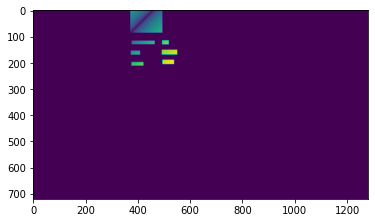

In [232]:
plt.imshow(gloc[3]())
plt.show()

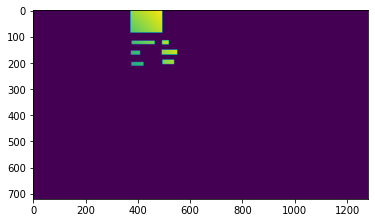

In [254]:
lol = np.load('gloc.npy')
plt.imshow(lol[3])
plt.show()

In [234]:
x_indices

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [717, 717, 717, ..., 717, 717, 717],
       [718, 718, 718, ..., 718, 718, 718],
       [719, 719, 719, ..., 719, 719, 719]])

In [229]:
np.indices((height, width))[1]

array([[   0,    1,    2, ..., 1277, 1278, 1279],
       [   0,    1,    2, ..., 1277, 1278, 1279],
       [   0,    1,    2, ..., 1277, 1278, 1279],
       ...,
       [   0,    1,    2, ..., 1277, 1278, 1279],
       [   0,    1,    2, ..., 1277, 1278, 1279],
       [   0,    1,    2, ..., 1277, 1278, 1279]])